## refer to [link](https://r4ds.had.co.nz/graphics-for-communication.html)

In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  3.0.1     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [19]:
install.packages('ggrepel')

Installing package into 'C:/Users/solanjx/OneDrive - AbbVie Inc (O365)/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggrepel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\solanjx\AppData\Local\Temp\RtmpG4SpHr\downloaded_packages


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


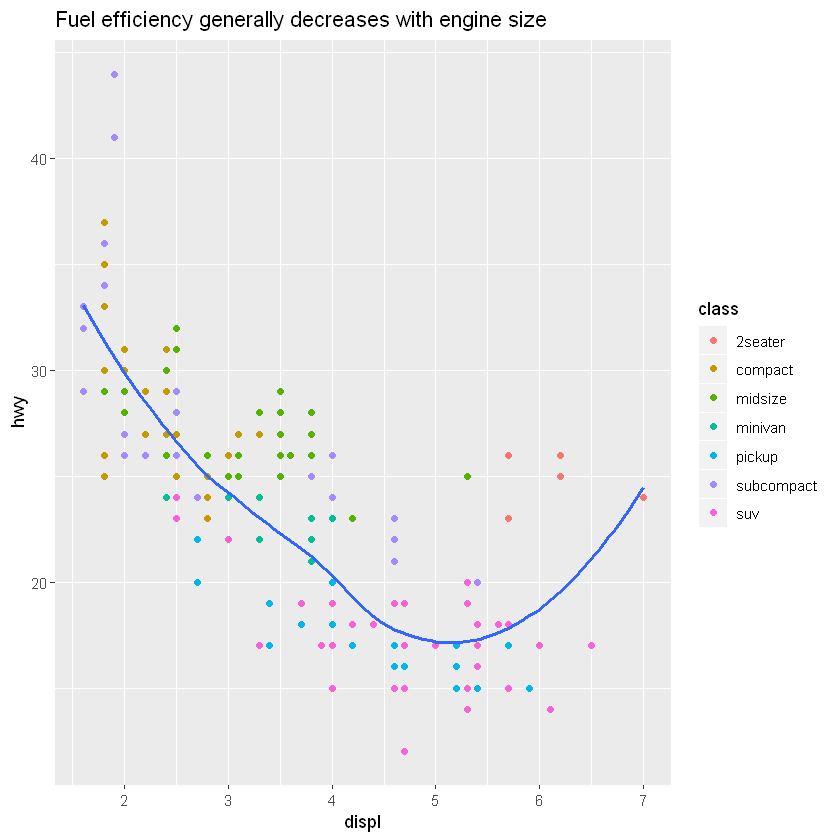

In [5]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  labs(title = "Fuel efficiency generally decreases with engine size")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


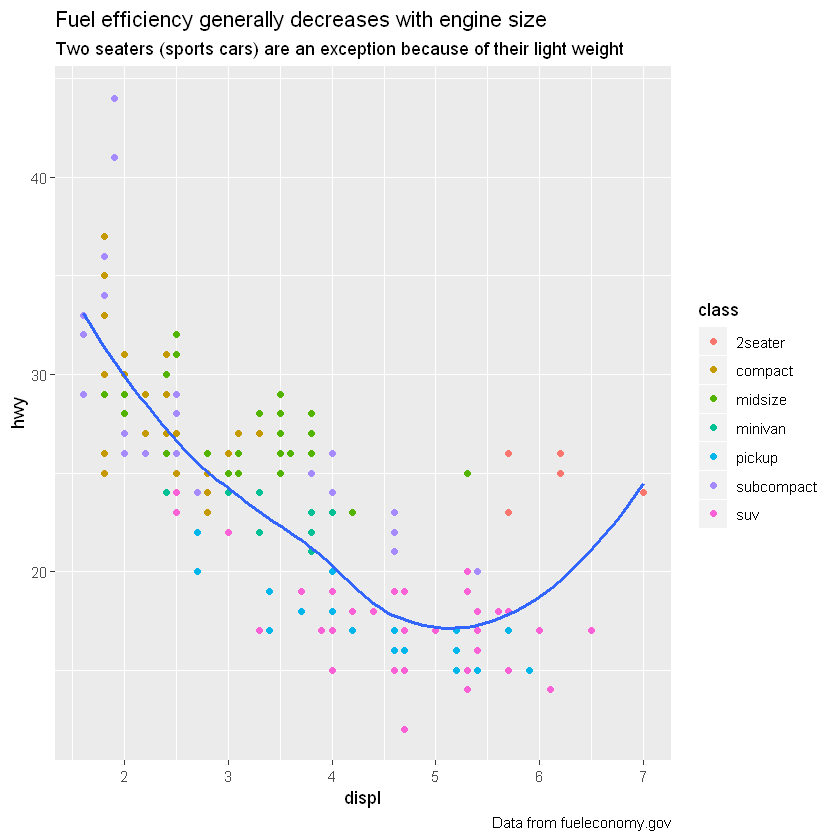

In [6]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  labs(
    title = "Fuel efficiency generally decreases with engine size",
    subtitle = "Two seaters (sports cars) are an exception because of their light weight",
    caption = "Data from fueleconomy.gov"
  )

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


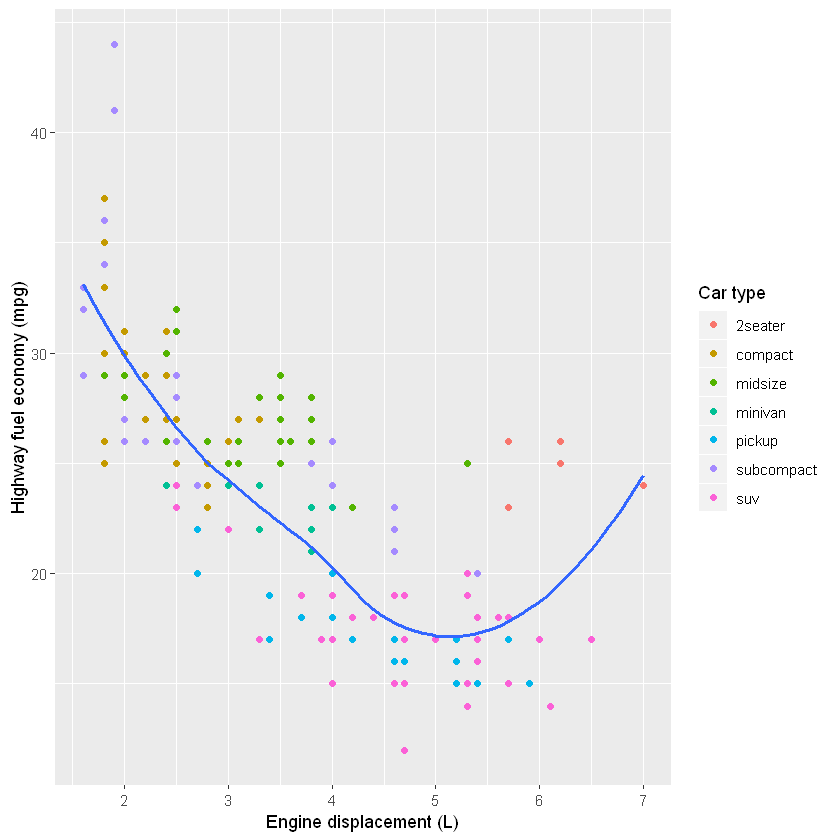

In [7]:
# replacing axes labels
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_smooth(se = FALSE) +
  labs(
    x = "Engine displacement (L)",
    y = "Highway fuel economy (mpg)",
    colour = "Car type"
  )

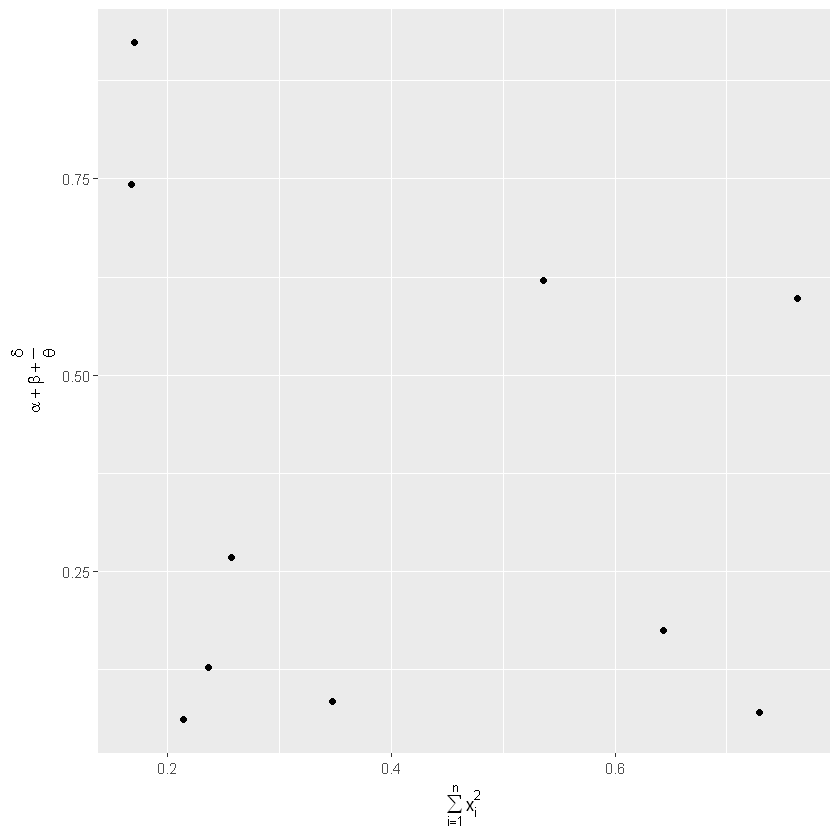

In [8]:
# using mathematical equation as labels
df <- tibble(
  x = runif(10),
  y = runif(10)
)
ggplot(df, aes(x, y)) +
  geom_point() +
  labs(
    x = quote(sum(x[i] ^ 2, i == 1, n)),
    y = quote(alpha + beta + frac(delta, theta))
  )

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan
nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize
subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv
toyota,toyota tacoma 4wd,2.7,2008,4,manual(m5),4,17,22,r,pickup
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact


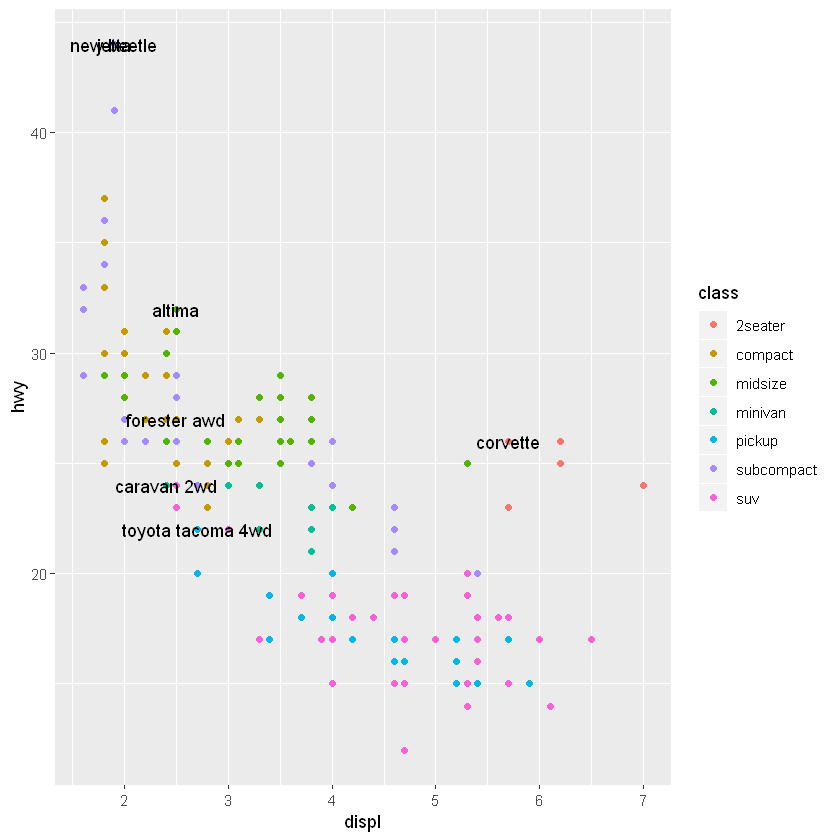

In [14]:
# annotations
#geom_text() is similar to geom_point(), but it has an additional aesthetic: label
best_in_class <- mpg %>%
  group_by(class) %>%
  filter(row_number(desc(hwy)) == 1)

ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_text(aes(label = model), data = best_in_class)
# mpg
best_in_class

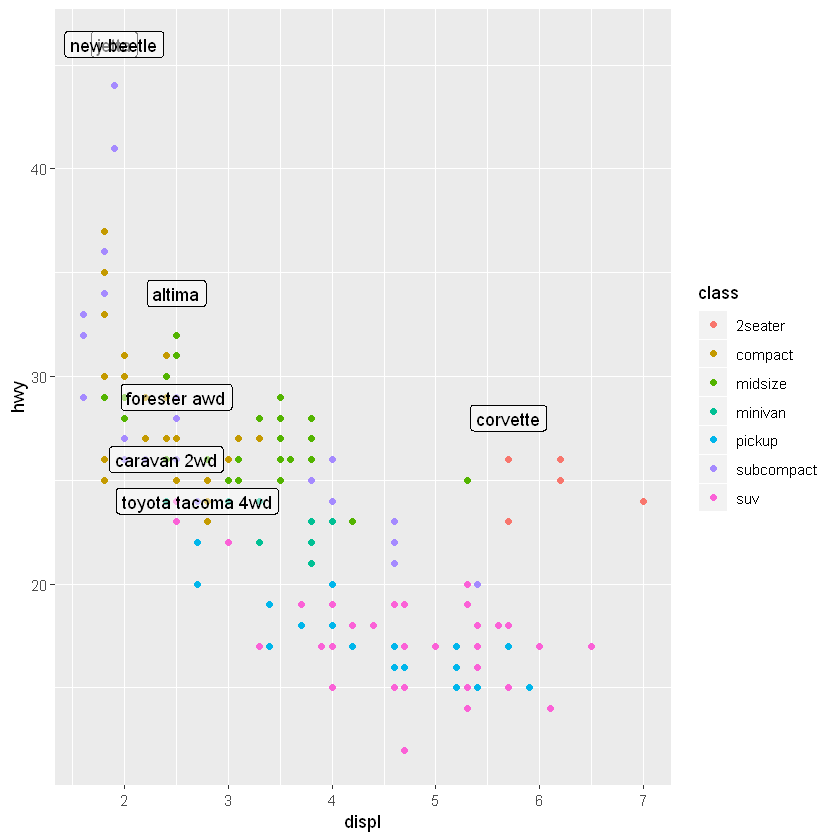

In [17]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_label(aes(label = model), data = best_in_class, nudge_y = 2, alpha = 0.5)

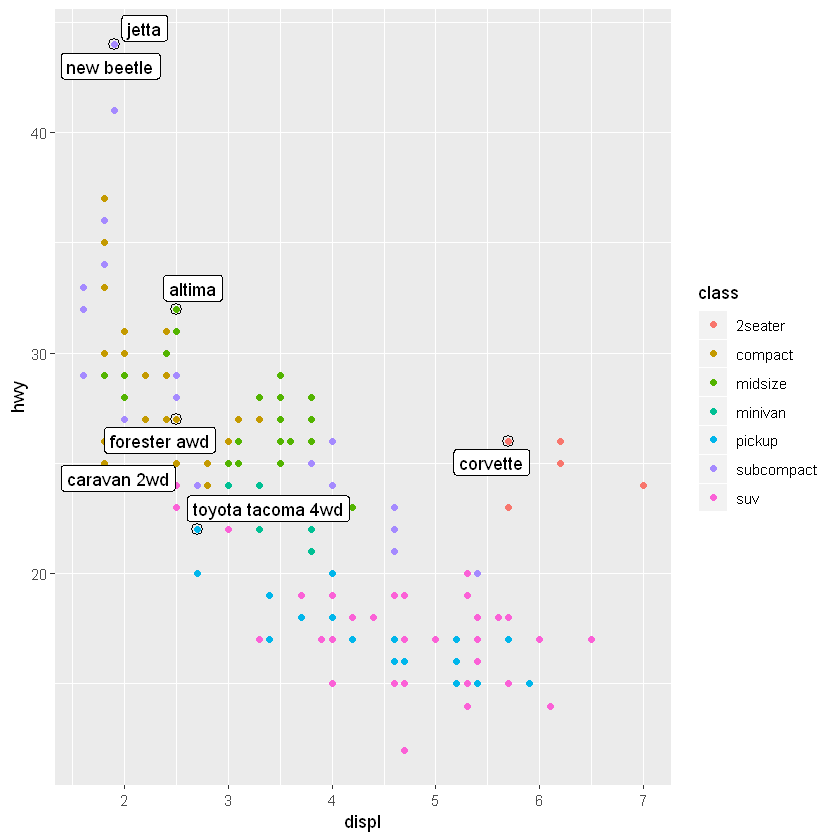

In [20]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_point(size = 3, shape = 1, data = best_in_class) +
  ggrepel::geom_label_repel(aes(label = model), data = best_in_class)

In [21]:
# scales


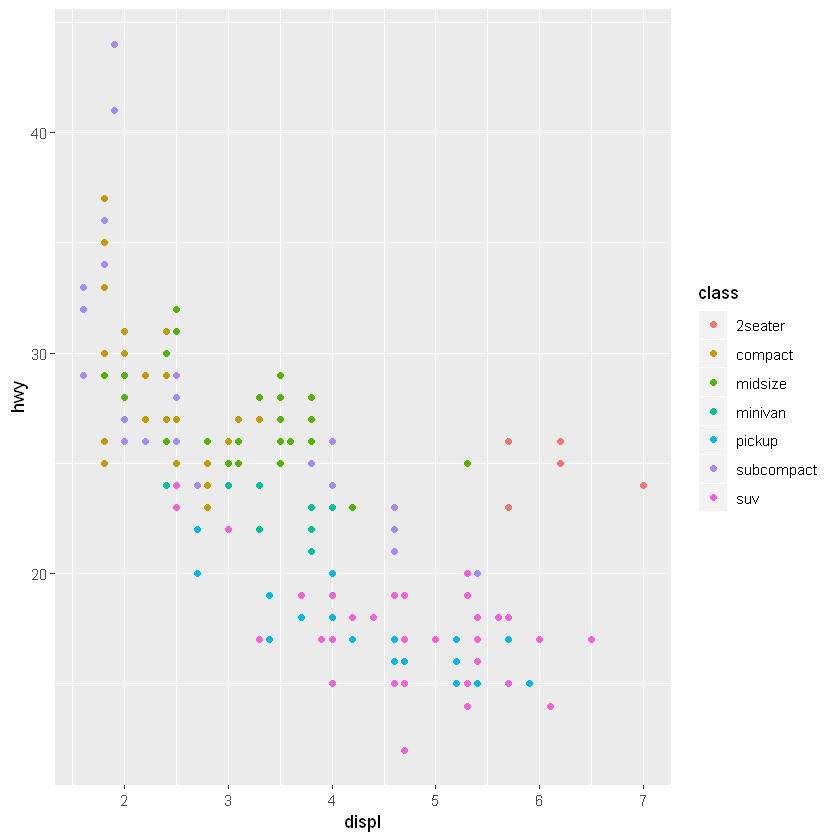

In [23]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class))
#ggplot automatically adds scales to the graph

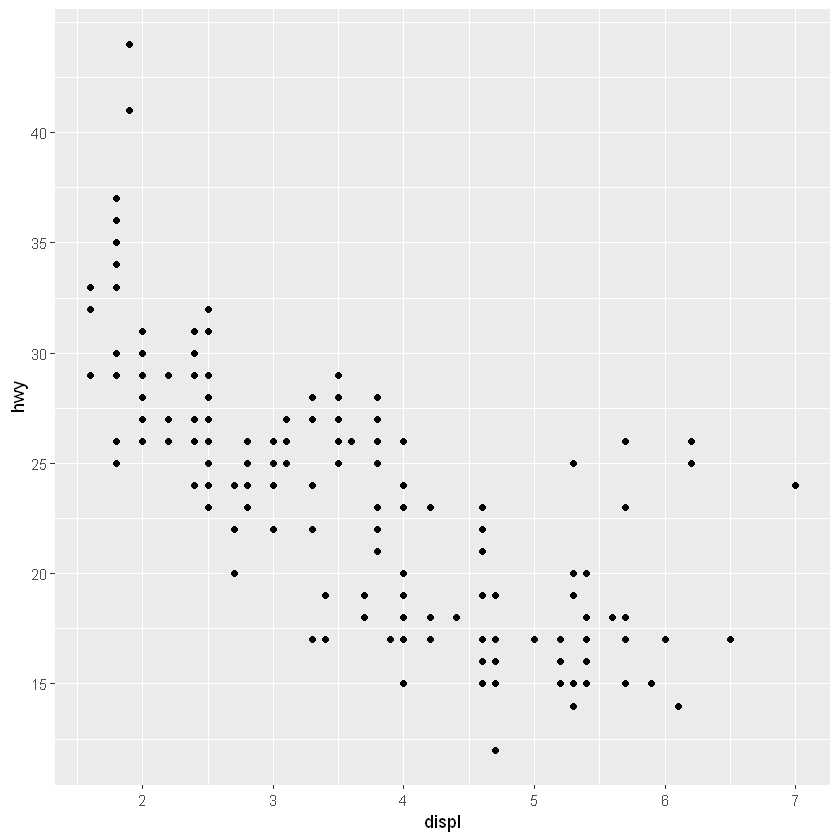

In [24]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  scale_y_continuous(breaks = seq(15, 40, by = 5))

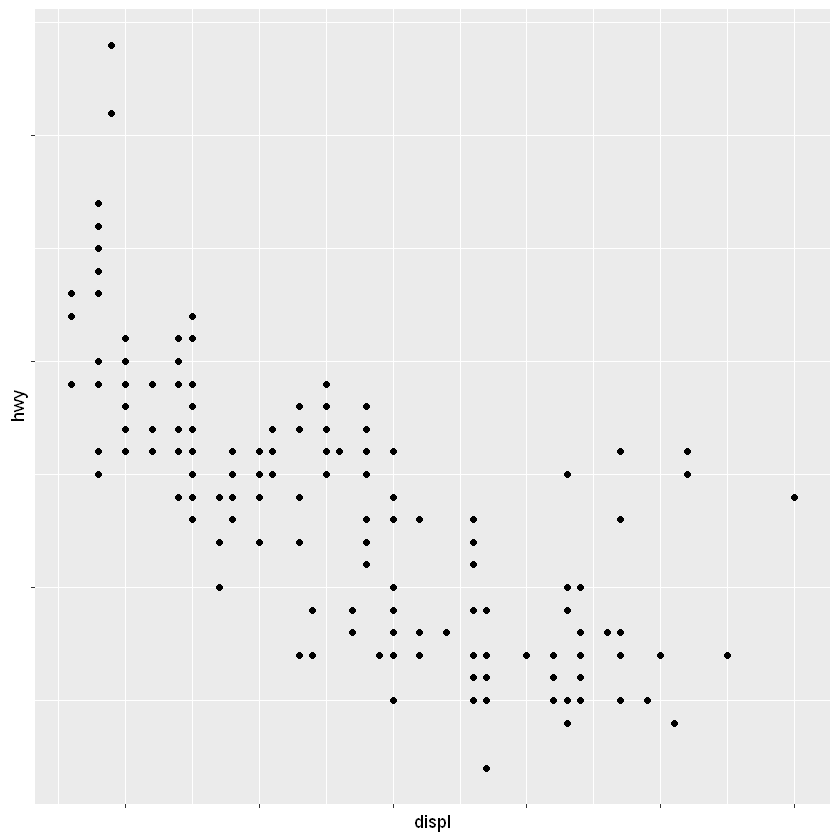

In [25]:
#suppressing labels
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  scale_x_continuous(labels = NULL) +
  scale_y_continuous(labels = NULL)

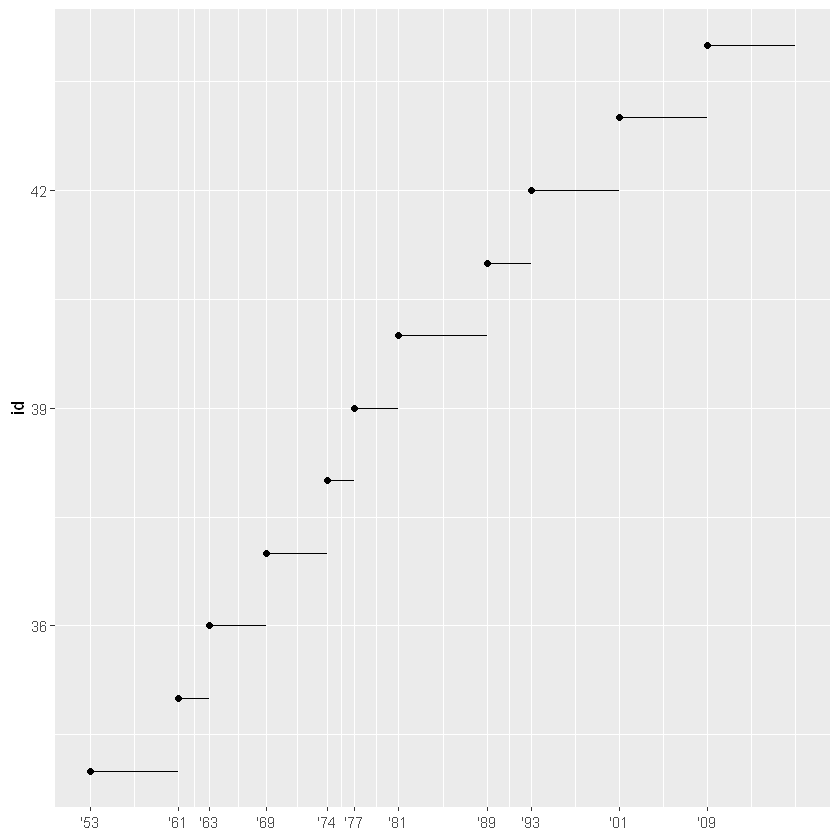

In [26]:
presidential %>%
  mutate(id = 33 + row_number()) %>%
  ggplot(aes(start, id)) +
    geom_point() +
    geom_segment(aes(xend = end, yend = id)) +
    scale_x_date(NULL, breaks = presidential$start, date_labels = "'%y")

In [28]:
#legends
# To control the overall position of the legend, you need to use a theme() setting

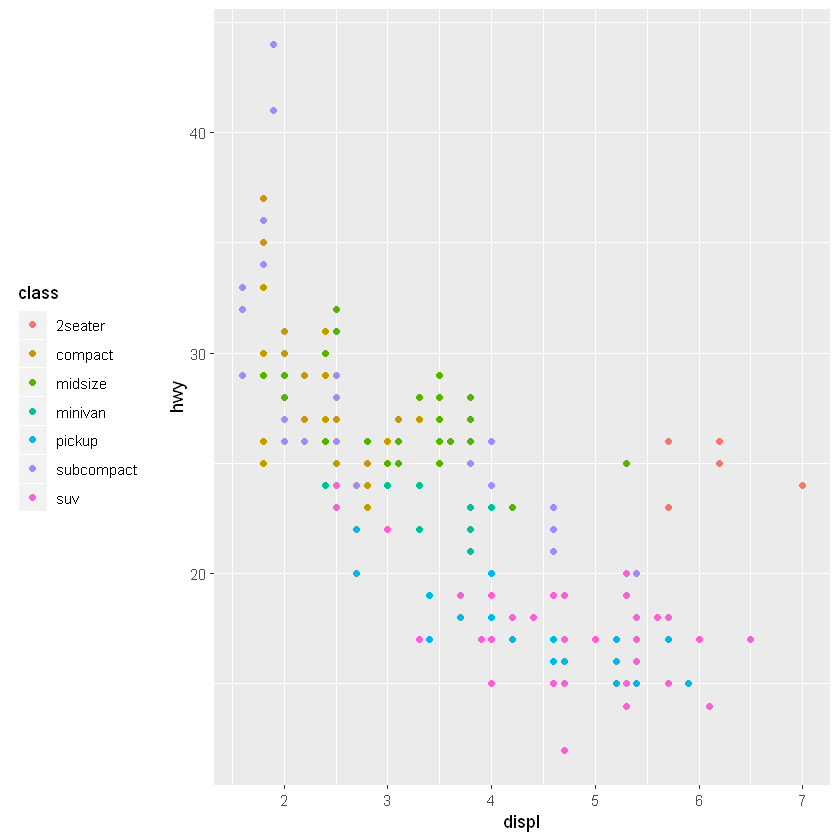

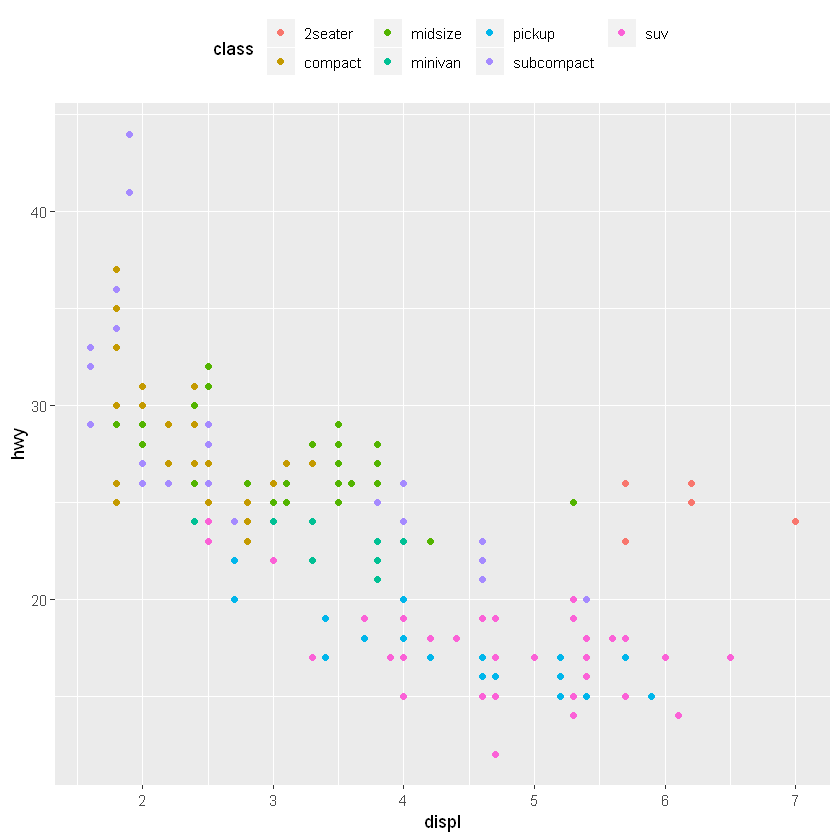

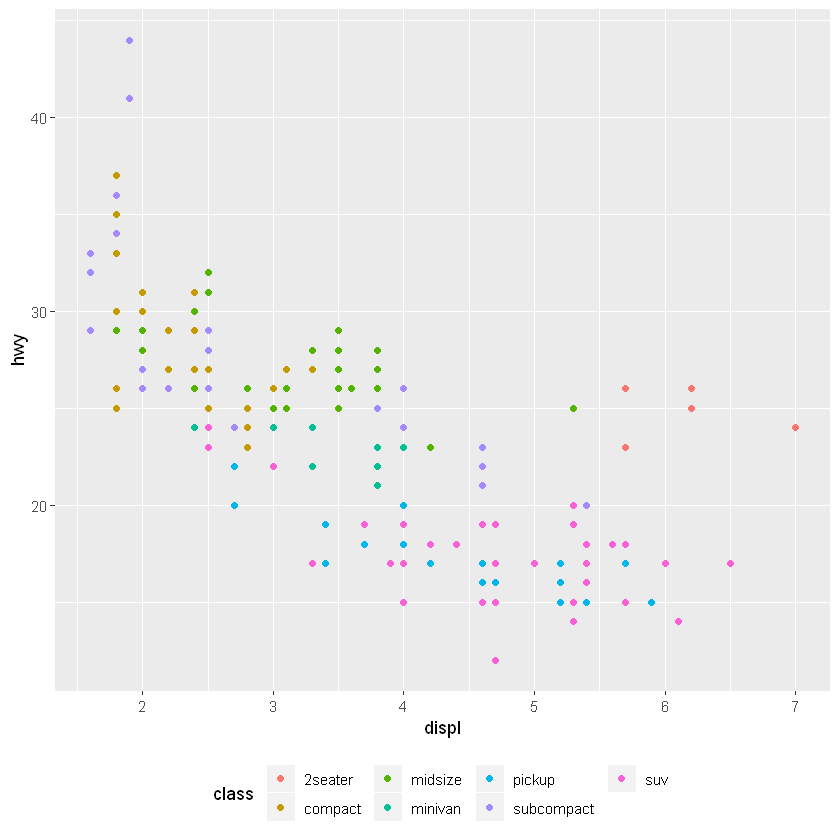

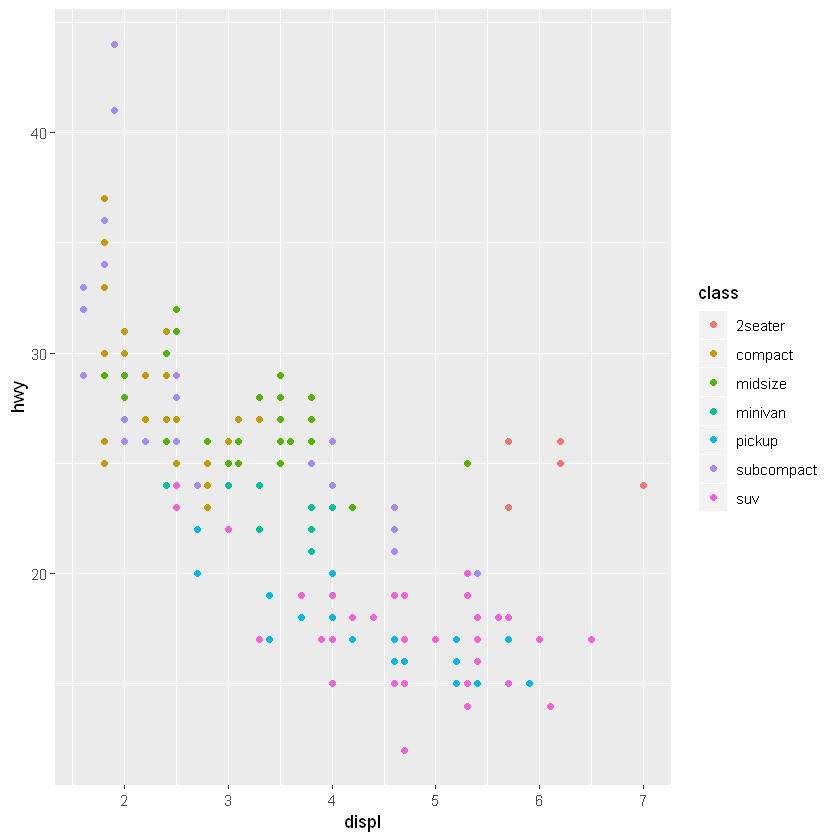

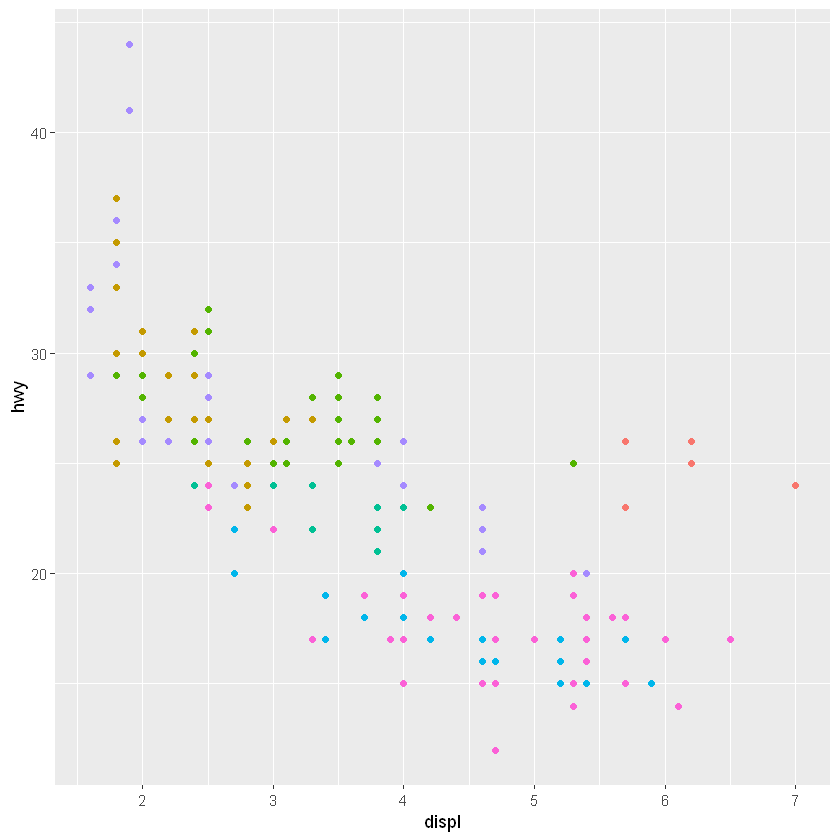

In [30]:
base <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class))

base + theme(legend.position = "left")
base + theme(legend.position = "top")
base + theme(legend.position = "bottom")
base + theme(legend.position = "right") # the default
base + theme(legend.position = "none") # suppress legend

In [31]:
# To control the display of individual legends, use guides()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


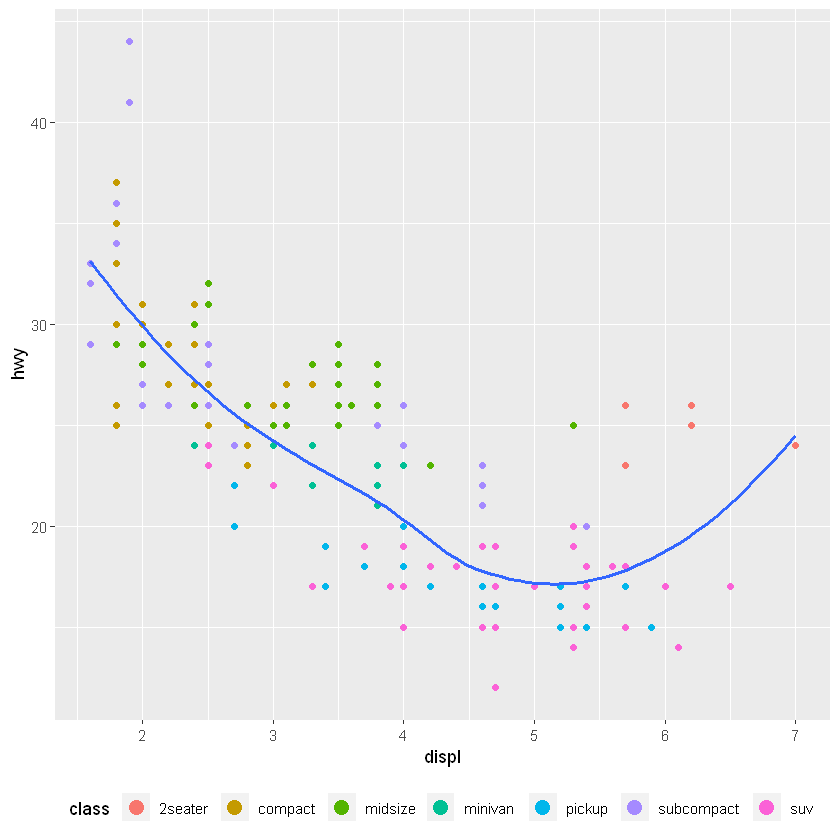

In [32]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_smooth(se = FALSE) +
  theme(legend.position = "bottom") +
  guides(colour = guide_legend(nrow = 1, override.aes = list(size = 4)))
#> `geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


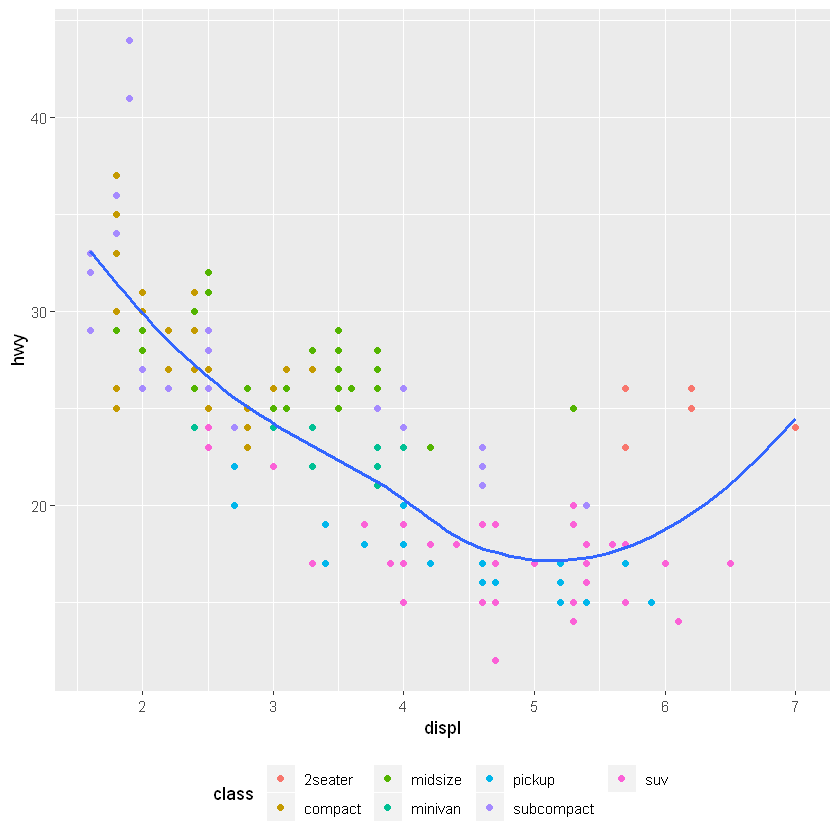

In [33]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_smooth(se = FALSE) +
  theme(legend.position = "bottom") 

In [34]:
# Replacing a scale

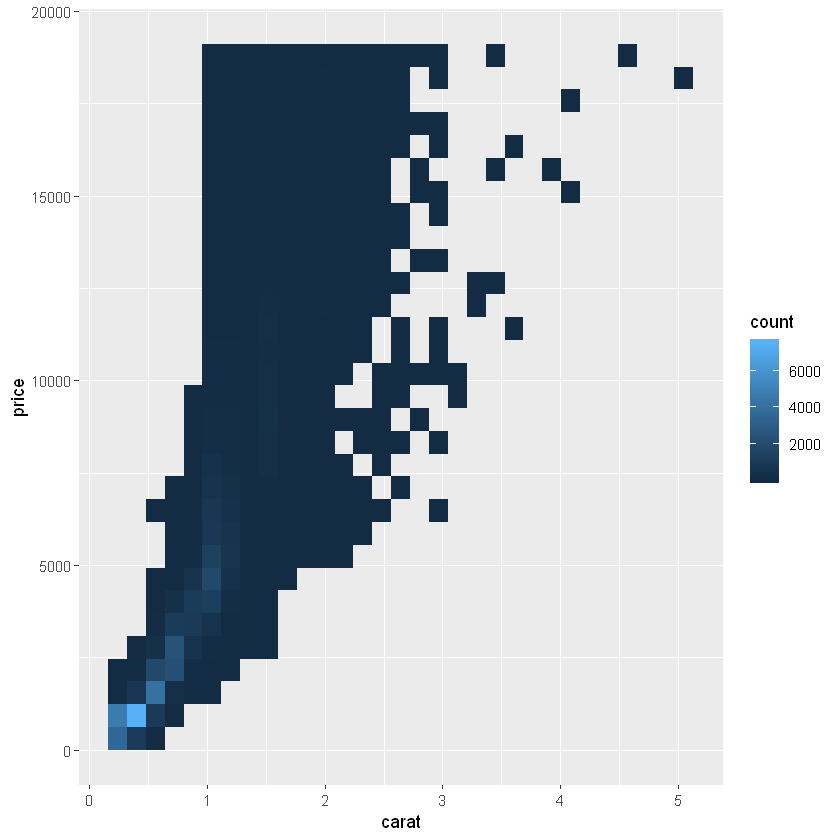

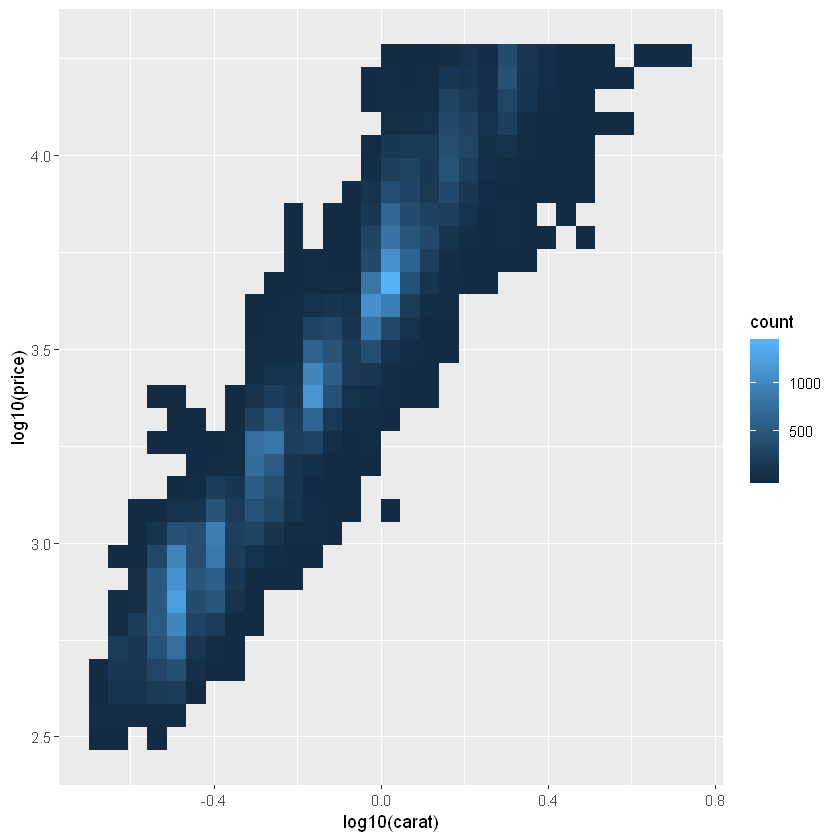

In [35]:
# crude way, where the real values on axes not shown
ggplot(diamonds, aes(carat, price)) +
  geom_bin2d()

ggplot(diamonds, aes(log10(carat), log10(price))) +
  geom_bin2d()

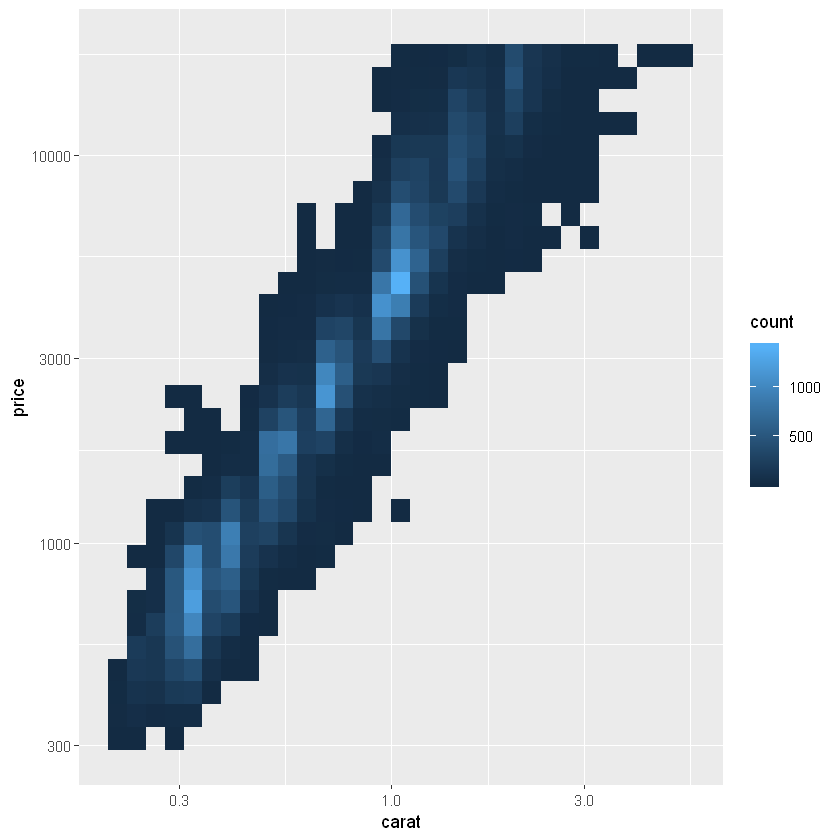

In [36]:
# recommended way
ggplot(diamonds, aes(carat, price)) +
  geom_bin2d() + 
  scale_x_log10() + 
  scale_y_log10()

In [37]:
# Another scale that is frequently customised is colour

In [40]:
#  Useful alternatives are the ColorBrewer scales
#which have been hand tuned to work better for people with common types of colour blindness.

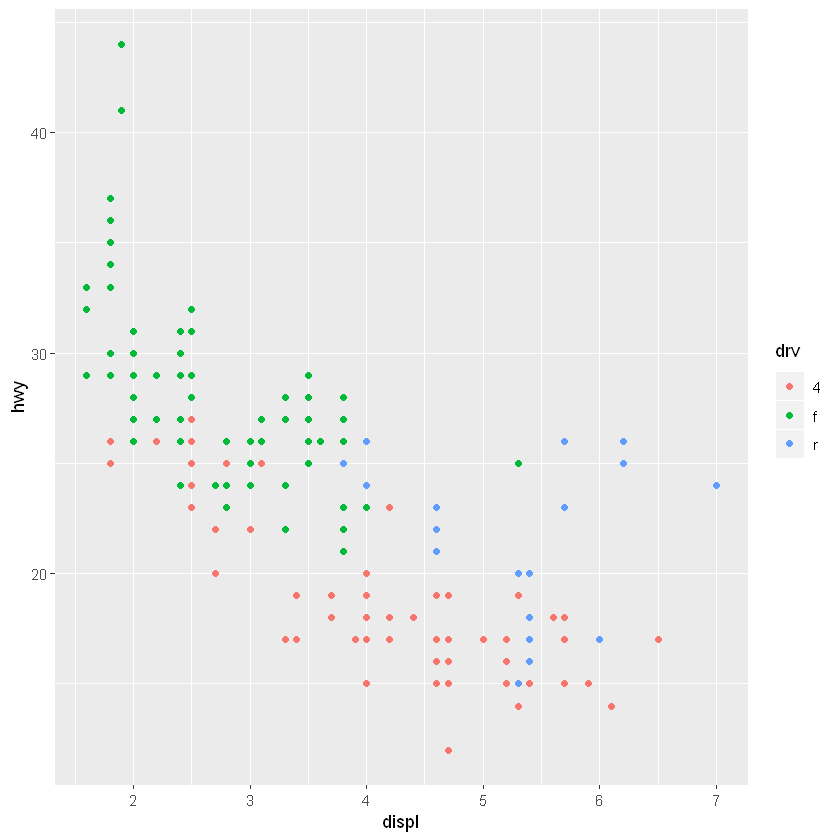

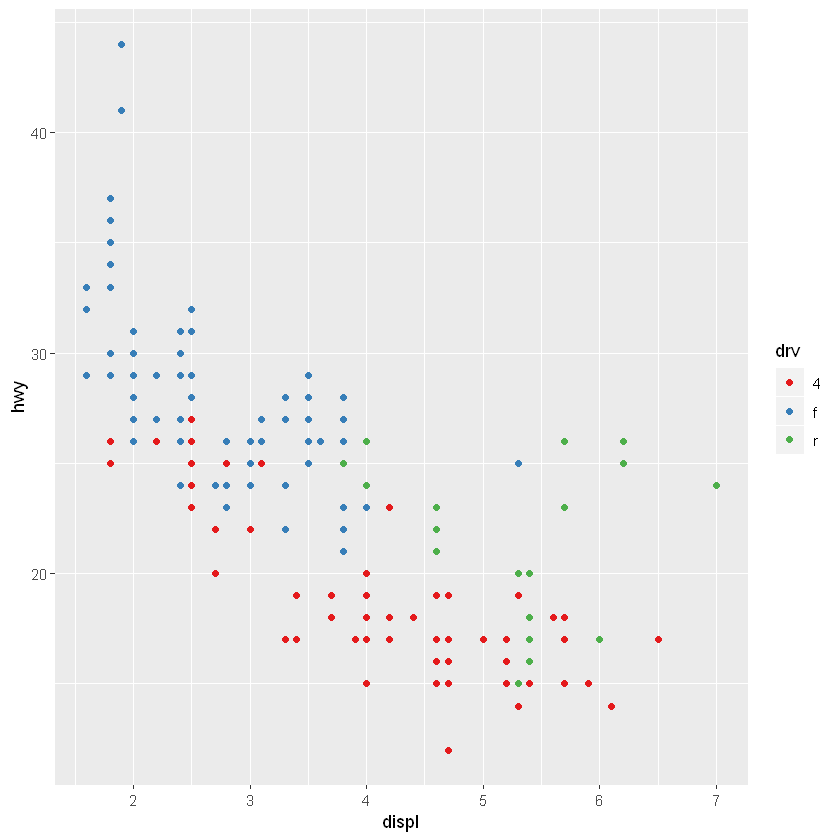

In [41]:
# two plots below look similar, but there is enough difference in the shades of red and green that the dots on the right 
# can be distinguished even by people with red-green colour blindness
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv))

ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv)) +
  scale_colour_brewer(palette = "Set1")

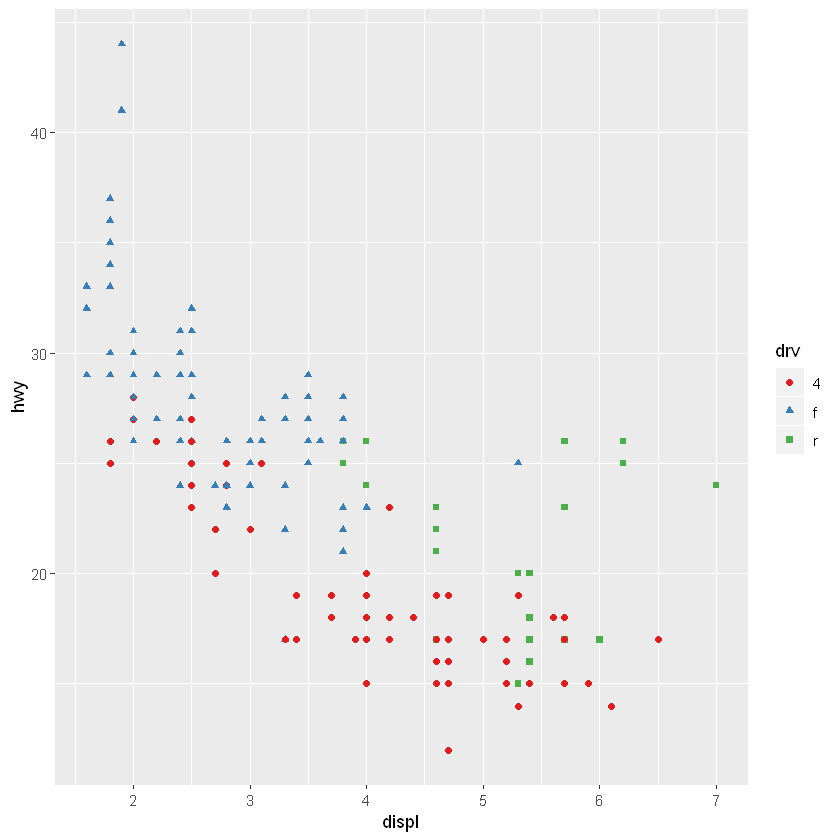

In [43]:
# Don’t forget simpler techniques. If there are just a few colours, you can add a redundant shape mapping
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv, shape = drv)) +
  scale_colour_brewer(palette = "Set1")

In [44]:
# The ColorBrewer scales are documented online at http://colorbrewer2.org/ and made available in R via the RColorBrewer package

In [45]:
# When you have a predefined mapping between values and colours, use scale_colour_manual()

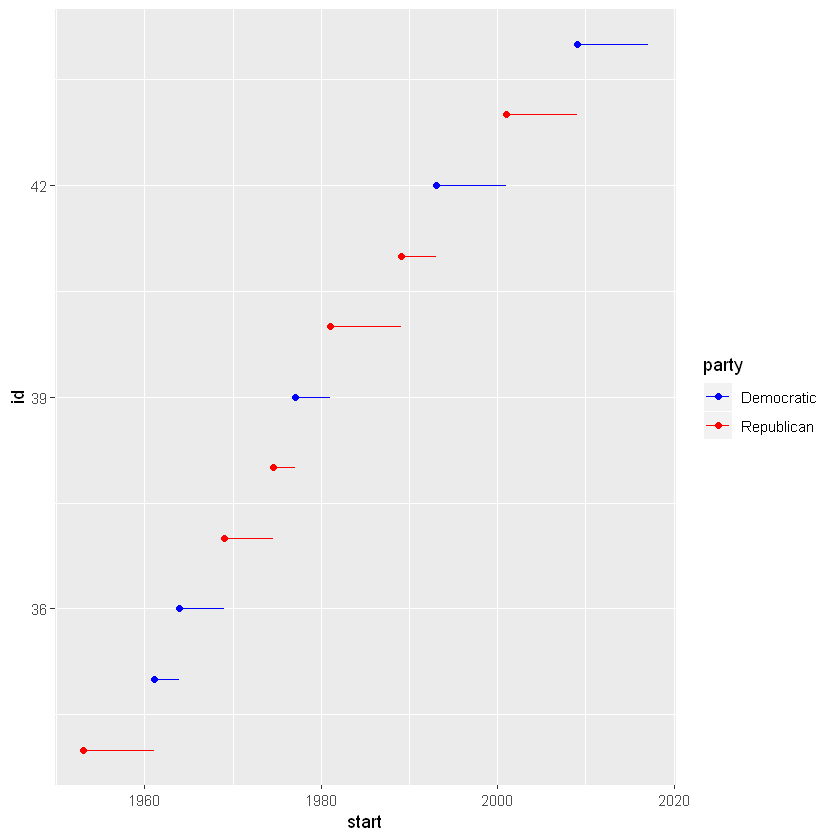

In [46]:
presidential %>%
  mutate(id = 33 + row_number()) %>%
  ggplot(aes(start, id, colour = party)) +
    geom_point() +
    geom_segment(aes(xend = end, yend = id)) +
    scale_colour_manual(values = c(Republican = "red", Democratic = "blue"))

In [47]:
# For continuous colour, you can use the built-in scale_colour_gradient() or scale_fill_gradient()

In [49]:
# If you have a diverging scale, you can use scale_colour_gradient2(). 
# That allows you to give, for example, positive and negative values different colours. 
# That’s sometimes also useful if you want to distinguish points above or below the mean.

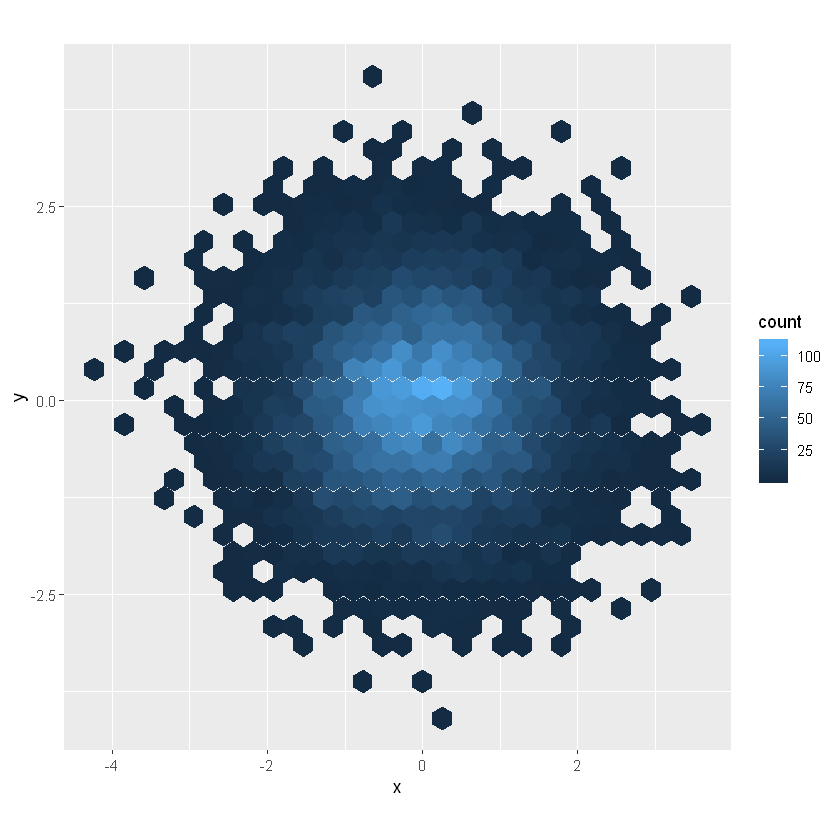

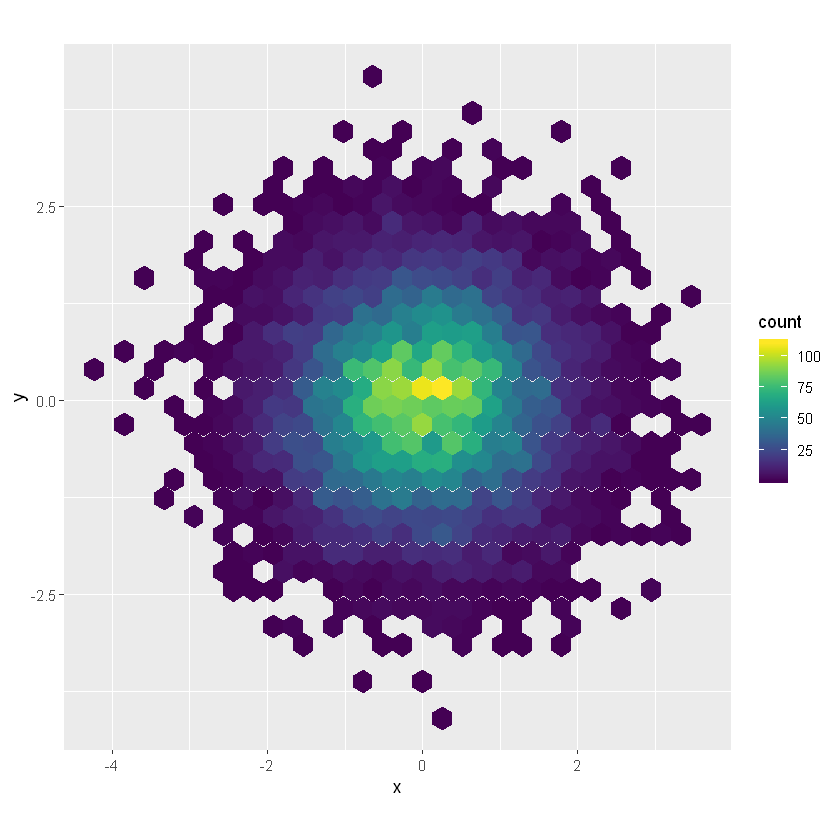

In [53]:
# Another option is scale_colour_viridis() provided by the viridis package
# install.packages('viridis')
df <- tibble(
  x = rnorm(10000),
  y = rnorm(10000)
)
ggplot(df, aes(x, y)) +
  geom_hex() +
  coord_fixed()

ggplot(df, aes(x, y)) +
  geom_hex() +
  viridis::scale_fill_viridis() +
  coord_fixed()

In [55]:
#One way to overcome this problem is to share scales across multiple plots, 
# training the scales with the limits of the full data

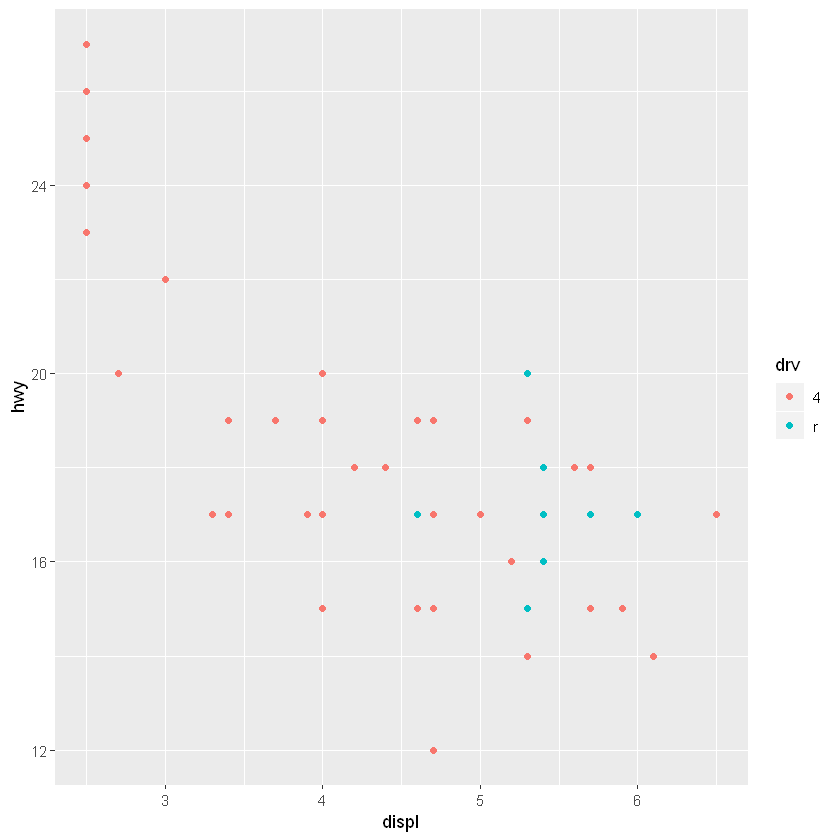

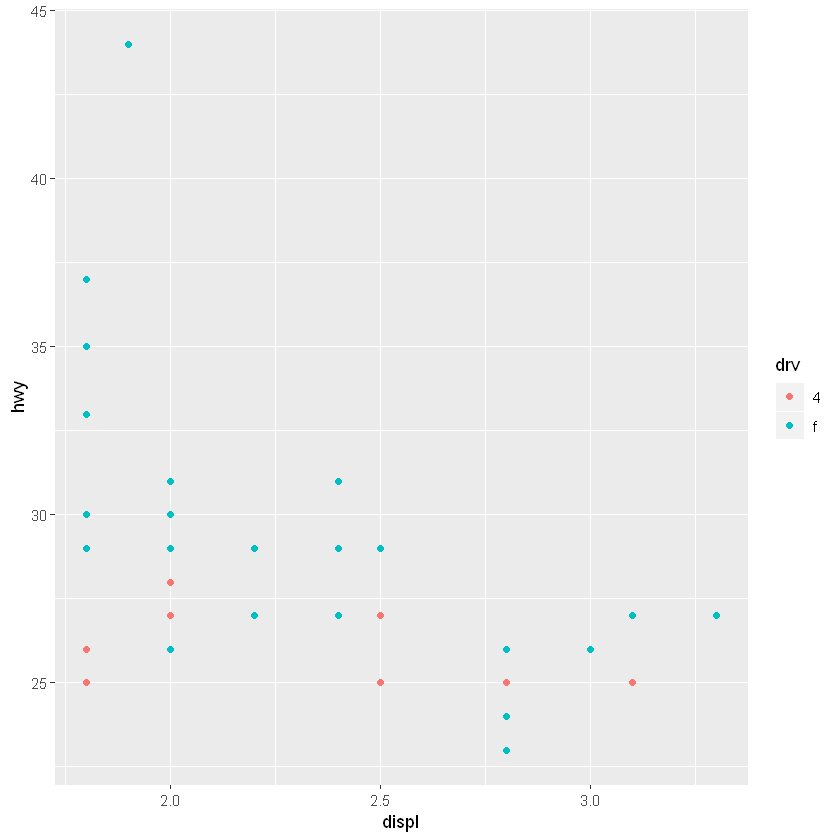

In [57]:
suv <- mpg %>% filter(class == "suv")
compact <- mpg %>% filter(class == "compact")

ggplot(suv, aes(displ, hwy, colour = drv)) +
  geom_point()

ggplot(compact, aes(displ, hwy, colour = drv)) +
  geom_point()


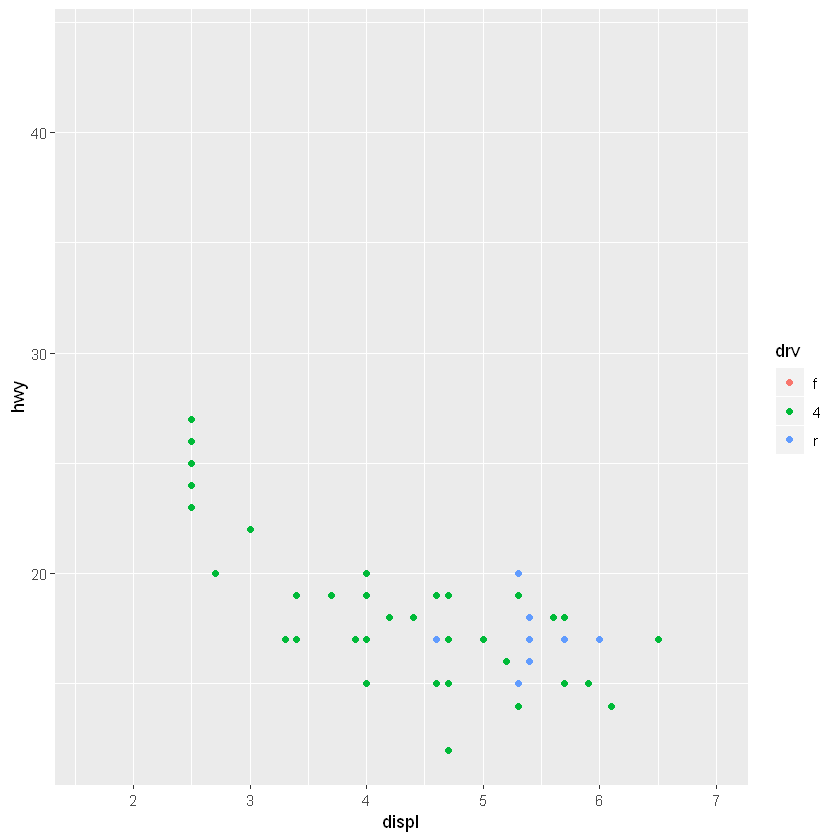

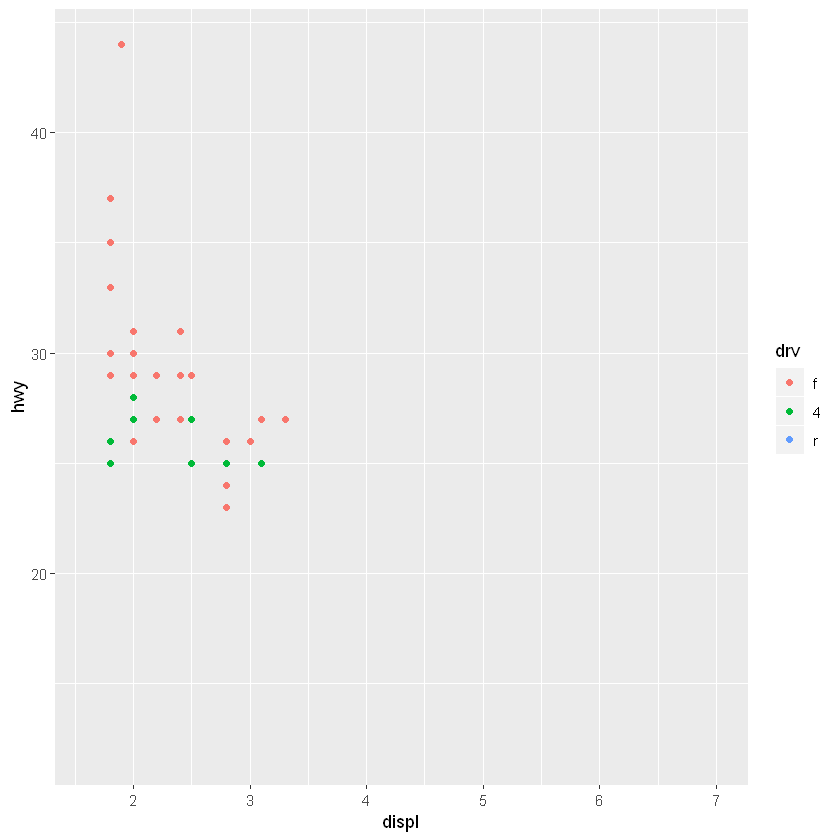

In [58]:
x_scale <- scale_x_continuous(limits = range(mpg$displ))
y_scale <- scale_y_continuous(limits = range(mpg$hwy))
col_scale <- scale_colour_discrete(limits = unique(mpg$drv))

ggplot(suv, aes(displ, hwy, colour = drv)) +
  geom_point() +
  x_scale +
  y_scale +
  col_scale

ggplot(compact, aes(displ, hwy, colour = drv)) +
  geom_point() +
  x_scale +
  y_scale +
  col_scale

### themes
![These are table options](https://d33wubrfki0l68.cloudfront.net/6be25cfb939e69d72df9fbc68e7a0334e1febefe/10e92/images/visualization-themes.png){ width=50% height=50%}

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


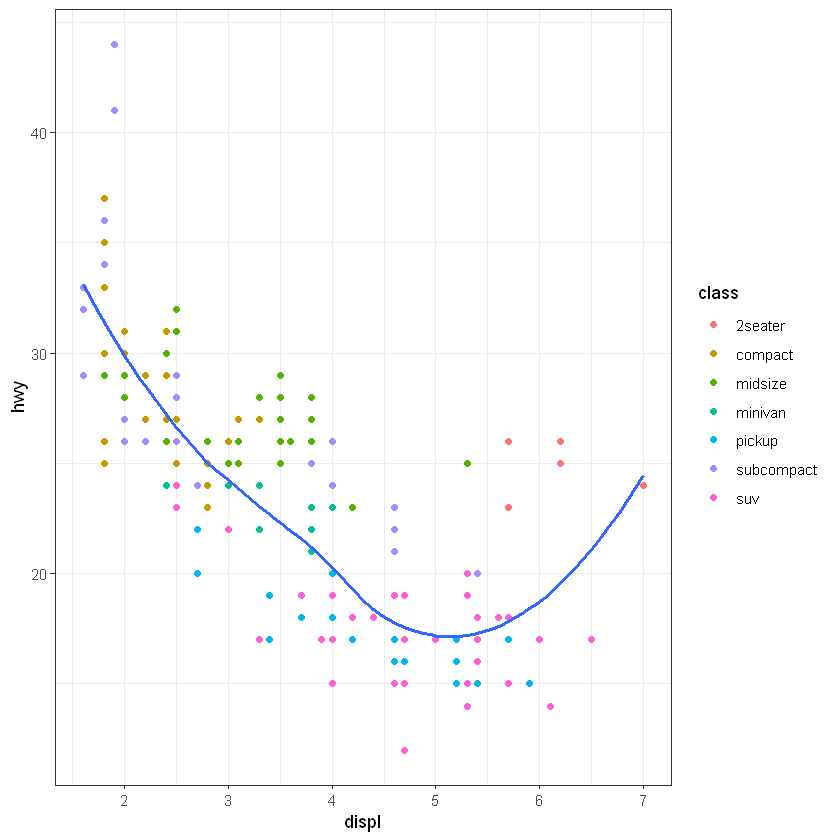

In [62]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  theme_bw()

Many people wonder why the default theme has a grey background. This was a deliberate choice because it puts the data forward while still making the grid lines visible. 